# HUD Capstone Project

### Project: HUB

* TestFit (name of the company)
	* what is the relationship to Alec (Clifton Harness (CEO))
	* Software company for architecture, engineering and construction
	* Generative design software: Making models of stuff for later physical assembly. 
	* How does the system operate? One time purchase? Subscription
* Research Question
    * How many apartments units are being built in the US everyday
        * Why?
        * So that Clifton can target the most valuable markets at the appropriate time
        * Distillate:
        * How many high-density, multifamily (MF) structures are being built in the US everyday. 
* Data
    * U.S Department of Housing and Urban Development, Federal Housing Administration (2006 - 2020)
* Deliverables
    * Deliver actionable insights on the drivers and patterns leading to an increase of high-density in the form of a Jupiter notebook
    * Develop a Time Series Regression + Classification model that predicts which markets are worth targeting and when. 
        * Historical examples to be used in establishment of threshold
            * Houston in 2009
            * Seattle in 2010
            * Dallas in 2012
        * Findings and model to present to potential employers
* Questions:
    * How much can we present about TestFit? Permission for public publication
    * How does the regression / classification apply
    * How granular are we talking, in terms of markets
    * Can we talk to Clifton? Questions about his market and business model
* Biggest concern at the moment:
    * What is our question - how is the data going to help us answer it? How is the question going to help our stakeholder?
    * What does the MVP look like? What are additional features that can lend to more features. 
* Questions for the team:
    * What areas do you enjoy / do best?
    * What tasks do you not like / feel you can’t do?
    * How do you like to work? Prefer quiet time? Prefer collaborative? 

### MVP:
* Time Series / Regression + Classification Model
    * Input: 
    * Output: Prediction of which markets, and at what time period, for business development
* Where is he going to deploy labor / marketing resources?
* Can we narrow it to the top 100 cities in the states?
* Focus on market value


--------


Recommendation of what cities to deploy to (based on "total morgage given"). We will focus on top 25 cities in the US.

### Notes from the data:
* Looking at commitment that has been approved (why commitment’s vs endorsements)
* 

### Timeline:

* Thursday, July 9: Data Scientist Day (Remote)
* Tuesday, July 7: Recordings Completed (in order to have time for video editing)
* Monday, July 6: Recordings
* Thursday, July 2: Review Panel 3 (with staff)
* Wednesday, July 1: Review Panel 2 (with another active cohort)
* Tuesday, June 30: Review Panel 1 (with staff)
* June 29: Polish presentation, code freeze (except if changing visualization titles, axes, etc.)
* June 26: complete project including presentation
* June 24: Not starting anything new, only finishing existing stuff
* MVP: EOD Tuesday
* Friday: acquire
* Wednesday, Thursday: plan

# Acquire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import wrangle
import preprocessing

# ignore warnings
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = wrangle.wrangle_hud()

In [3]:
df.head()

,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,...,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount,is_refinance,is_new_construction
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,...,False,False,False,False,False,False,Firm Comit then Owner Withdrew,271700,True,False
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,...,False,False,False,False,False,False,Finally Endorsed,168300,True,False
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,...,False,False,False,False,False,False,Finally Endorsed,3886800,True,False
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,...,False,False,False,False,False,False,Finally Endorsed,4000000,True,False
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,...,False,False,False,False,False,False,Firm Expired,5247700,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20409 entries, 0 to 20514
Data columns (total 31 columns):
fha_number                                                              20409 non-null object
project_name                                                            20409 non-null object
project_city                                                            20409 non-null object
project_state                                                           20409 non-null object
basic_fha_risk_share_or_other                                           20409 non-null object
program_category                                                        20409 non-null object
activity_description                                                    20409 non-null object
activity_group                                                          20409 non-null object
facility_type                                                           20409 non-null object
program_designation                          

In [5]:
# States based on the city counts

df.groupby("project_state")["project_city"].count().nlargest(10)

project_state
TX    1732
CA    1270
OH    1190
IL    1059
IN     973
MI     876
FL     864
MA     849
NY     756
NC     754
Name: project_city, dtype: int64

In [6]:
df.groupby("project_state")["final_mortgage_amount"].sum().nlargest(10)

project_state
TX    22329745314
NY    15977867223
CA    15158488374
FL    11617876940
MA    11486363616
IL    10728287096
MD     9555527369
VA     8615469112
NC     7765433294
OH     7557835653
Name: final_mortgage_amount, dtype: int64

In [7]:
df.nlargest(1, columns="final_mortgage_amount")["project_city"]

2929    Trenton
Name: project_city, dtype: object

In [8]:
print(
    
f'''
      
Morgages Max:
The year is {df.nlargest(1, columns="final_mortgage_amount")["fiscal_year_of_firm_commitment"].values}      
The max is ${df["final_mortgage_amount"].max():,}
The city: {df.nlargest(1, columns="final_mortgage_amount")["project_city"].values}, {df.nlargest(1, columns="final_mortgage_amount")["project_state"].values}

Morgages Min:
The year is {df.nsmallest(1, columns="final_mortgage_amount")["fiscal_year_of_firm_commitment"].values}      
The max is ${df["final_mortgage_amount"].min():,}
The city: {df.nsmallest(1, columns="final_mortgage_amount")["project_city"].values}, {df.nsmallest(1, columns="final_mortgage_amount")["project_state"].values}


    
    
''')


      
Morgages Max:
The year is [2009]      
The max is $755,874,500
The city: ['Trenton'], ['NJ']

Morgages Min:
The year is [2007]      
The max is $70,100
The city: ['Aurora'], ['NC']


    
    



Text(0.5, 0, 'Dollars')

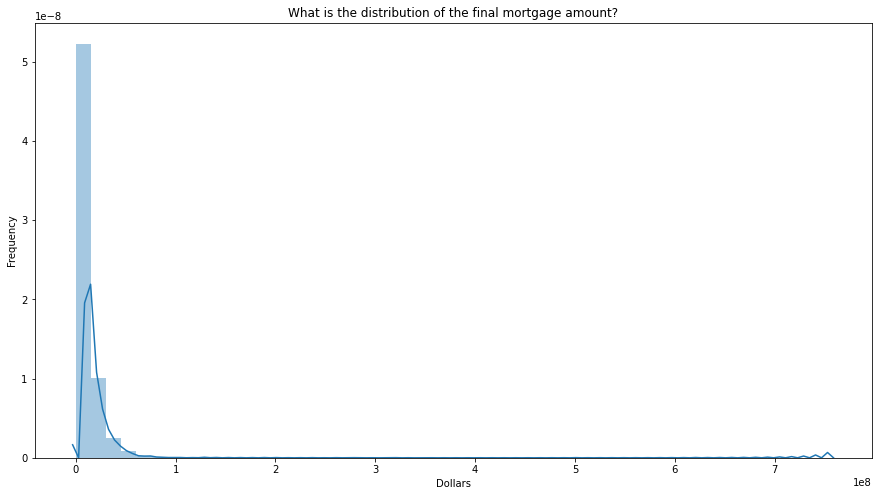

In [9]:
plt.figure(figsize=(15, 8))
sns.distplot(df["final_mortgage_amount"])
plt.title("What is the distribution of the final mortgage amount?")
plt.ylabel("Frequency")
plt.xlabel("Dollars")

In [10]:
# what are the other projects in roxbury?

df[df["activity_description"] == "SubRehab"]["final_mortgage_amount"].median()

6702500.0

In [11]:
# What is the mean?

print(f'The mean mortgage is: ${round(df["final_mortgage_amount"].mean()):,}')

The mean mortgage is: $10,785,326


In [12]:
# What is the upper limit looking at?

df[df["final_mortgage_amount"] > df["final_mortgage_amount"].mean()].groupby("project_state")["final_mortgage_amount"].count().sort_values(ascending=False)

project_state
TX    791
CA    420
FL    402
MA    379
NY    369
IL    344
VA    289
MD    280
NC    248
OH    204
IN    191
MN    190
MI    188
CO    183
TN    161
NJ    157
GA    154
WA    132
LA    126
AZ    123
MO    106
PA    100
UT     96
AL     95
SC     86
OR     78
WI     74
NV     70
CT     65
DC     59
OK     49
MS     43
RI     37
NH     34
NE     33
AR     32
KY     31
KS     25
NM     25
WV     23
ID     21
IA     21
DE     18
MT     17
HI     13
WY      9
ME      8
SD      8
ND      6
VT      4
PR      1
VI      1
AK      1
Name: final_mortgage_amount, dtype: int64

In [13]:
df["project_city"].value_counts()

Chicago              320
Indianapolis         257
Columbus             170
Los Angeles          143
Houston              137
                    ... 
Sommerville            1
City Of Frederick      1
Amboy                  1
Blackstone             1
Oldsmar                1
Name: project_city, Length: 4187, dtype: int64

### What are the characteristics of loan practices in Houston (2009), Seattle (2010),  and Dallas (2012)?

In [14]:
# start with Houston 2009

houston = df[df["project_city"] == "Houston"]
print(houston.shape[0])
houston.head()

137


,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,...,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount,is_refinance,is_new_construction
277,11411226,Enclave at Willowbrook,Houston,TX,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,...,False,False,False,False,False,False,Finally Endorsed,10114700,True,False
657,11435577,Enclave at Cornerstone Apts.,Houston,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,...,False,False,False,False,False,False,Finally Endorsed,12633300,True,False
791,11435583,Enclave at Copperfield Apartments,Houston,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,...,False,False,False,False,False,False,Finally Endorsed,13852600,True,False
1236,11411238,South Houston Vista Apartments,Houston,TX,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,...,False,False,False,True,False,False,Finally Endorsed,1872900,True,False
1301,11411239,Goldberg B'nai B'rith Towers I & II,Houston,TX,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,...,False,False,False,True,False,False,Finally Endorsed,10388500,True,False


In [15]:
houston = houston.set_index("fiscal_year_of_firm_commitment")

Text(0, 0.5, 'Dollars')

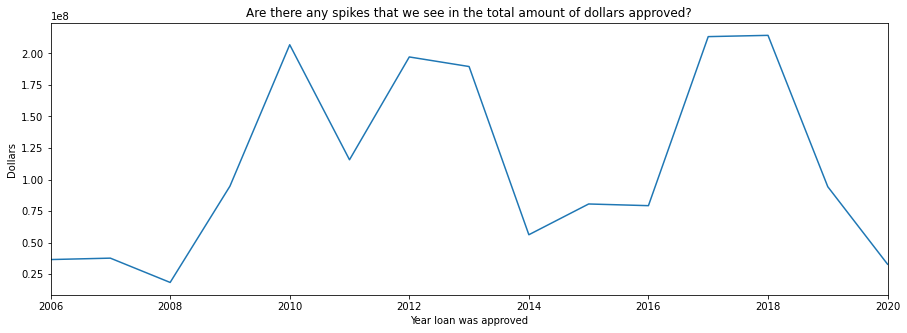

In [16]:
houston.groupby(houston.index)["final_mortgage_amount"].sum().plot.line(figsize=(15, 5))
plt.title("Are there any spikes that we see in the total amount of dollars approved?")
plt.xlabel("Year loan was approved")
plt.ylabel("Dollars")

Text(0, 0.5, 'Number of loans approved')

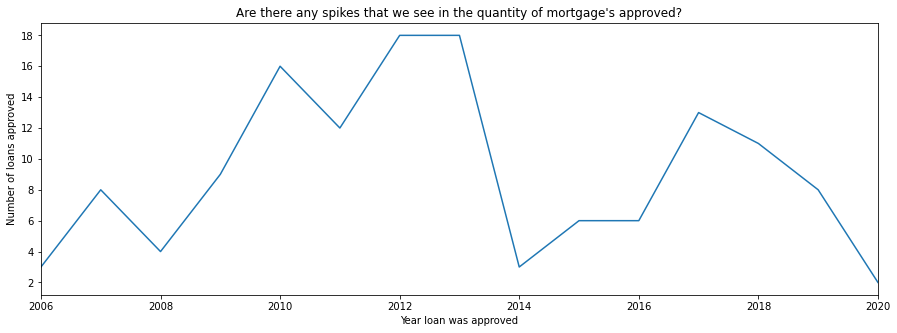

In [17]:
houston.groupby(houston.index)["final_mortgage_amount"].count().plot.line(figsize=(15, 5))
plt.title("Are there any spikes that we see in the quantity of mortgage's approved?")
plt.xlabel("Year loan was approved")
plt.ylabel("Number of loans approved")

Text(0, 0.5, 'Total amount granted, in dollars')

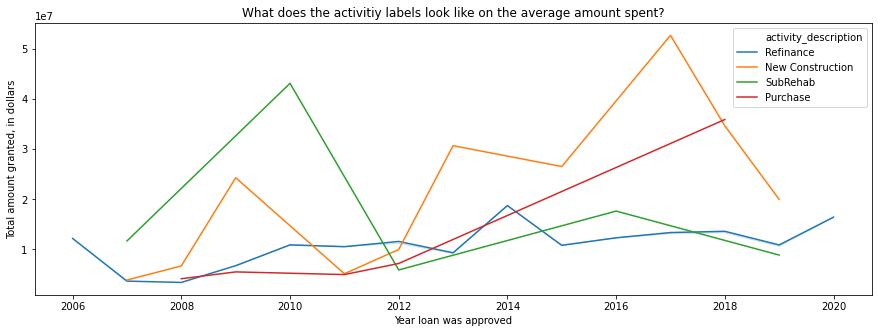

In [18]:
# What does the activity look like the most?

plt.figure(figsize=(15, 5))
sns.lineplot(data=houston, x=houston.index, y= "final_mortgage_amount", hue="activity_description", ci=False)
plt.title("What does the activitiy labels look like on the average amount spent?")
plt.xlabel("Year loan was approved")
plt.ylabel("Total amount granted, in dollars")

Interestingly, we see that there is definitively an upwards spike in 2019 in both the quantity of mortgage's approved, and the total amount of money approved. In terms of the activity description, we can see that `purchase` and `new construction` actually took the majority of the spike in terms of cash flow. The `SubRehab` actually seemed to decrease, meaning that there were more new buildings being built, and less building being remodeled.

----

In [19]:
# Let's look at Seattle 2010

seattle = df[df["project_city"] == "Seattle"]
print(seattle.shape[0])
seattle.head()

59


,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,...,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount,is_refinance,is_new_construction
181,12735464,Jackson Apartments,Seattle,WA,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,...,False,False,False,False,False,False,Finally Endorsed,464750,True,False
426,12743123,Sea Mar Community Care Center,Seattle,WA,Basic FHA,232 Health Care,Refinance,Refi/ Pchse,Nursing/ICF,Nursing/ICF a7 of NC/SR,...,False,False,False,False,False,False,Finally Endorsed,9800000,True,False
2213,12710026,Elizabeth James House,Seattle,WA,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/241a on Apts (not 236/BMIR),...,False,False,False,False,False,False,Finally Endorsed,1940400,True,False
3444,12745003,Mary Ruth Manor,Seattle,WA,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,...,False,False,False,False,False,False,Finally Endorsed,557500,True,False
4996,12711153,The Park on Highland Drive Apartments,Seattle,WA,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,...,False,False,False,False,False,False,Firm Comit then Owner Withdrew,5132700,True,False


In [20]:
seattle = seattle.set_index("fiscal_year_of_firm_commitment")

Text(0.5, 1.0, 'Are there any spikes that we see in the total amount of dollars approved?')

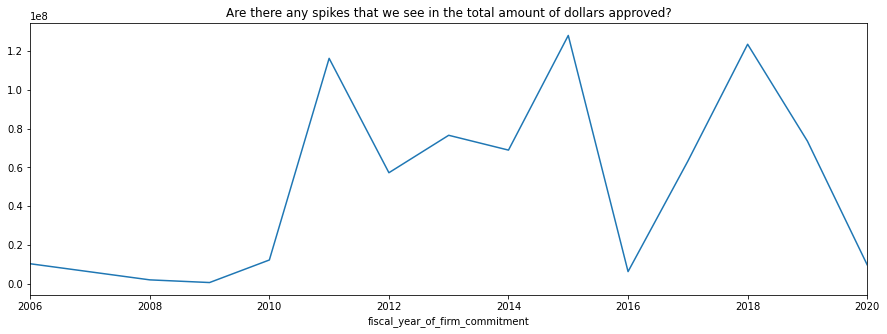

In [21]:
seattle.groupby(seattle.index)["final_mortgage_amount"].sum().plot.line(figsize=(15, 5))
plt.title("Are there any spikes that we see in the total amount of dollars approved?")

Text(0.5, 1.0, "Are there any spikes that we see in the quantity of mortgage's approved?")

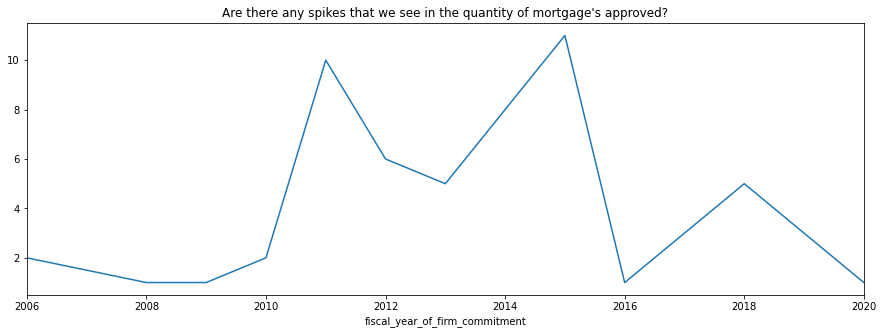

In [22]:
seattle.groupby(seattle.index)["final_mortgage_amount"].count().plot.line(figsize=(15, 5))
plt.title("Are there any spikes that we see in the quantity of mortgage's approved?")

Text(0.5, 1.0, 'What does the activitiy labels look like on the average amount spent?')

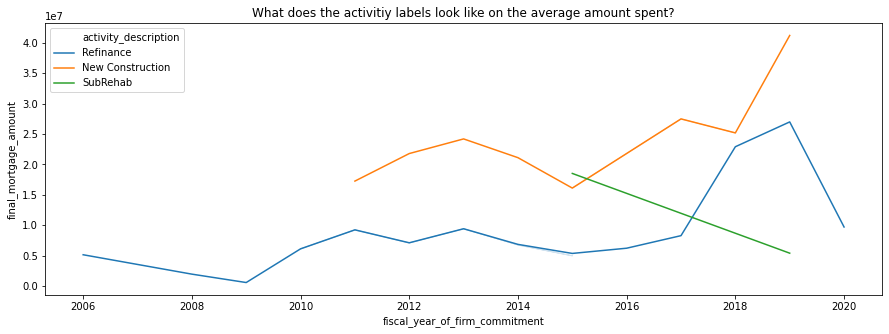

In [23]:
# What does the activity look like the most?

plt.figure(figsize=(15, 5))
sns.lineplot(data=seattle, x=seattle.index, y= "final_mortgage_amount", hue="activity_description", ci=False)
plt.title("What does the activitiy labels look like on the average amount spent?")

Seattle is a less clear case. We do see very clear spikes in 2010 when it comes to total amount of dollars approved, and the number of loans issued, but there isn't as much of a clear trend when we look at the activity. It seems that there was an increase in `refinancing` in 2009, but there was no purchases, and new construction ddidn't really start until 2011. I think this one in particular is being affected by a lack of data (only 5 data points from Seattle.)

In [24]:
# Let's look at Dallas 2012

dallas = df[df["project_city"] == "Dallas"]
print(dallas.shape[0])
dallas.head()

112


,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,...,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount,is_refinance,is_new_construction
113,11311098,City Park Lofts,Dallas,TX,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,...,False,False,False,False,False,False,Finally Endorsed,1312000,True,False
118,11397263,Ewing Villas,Dallas,TX,Risk Sharing,QPE Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Rec Comp,...,False,False,False,False,False,False,Finally Endorsed,3865000,False,True
170,11311099,"ECHAD Apartments, Phase I & II",Dallas,TX,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,...,False,False,False,True,False,False,Finally Endorsed,6280900,True,False
847,11322027,Signature Pointe on the Lake,Dallas,TX,Basic FHA,232 Health Care,Refinance,Refi/ Pchse,Nursing/ICF,Nursing/ ICF 223f,...,False,False,False,False,False,False,Firm Comit then Owner Withdrew,40000000,True,False
912,11322028,"Villa at Mountain View, The",Dallas,TX,Basic FHA,232 Health Care,Refinance,Refi/ Pchse,Nursing/ICF,Nursing/ ICF 223f,...,False,False,False,False,False,False,Finally Endorsed,11395000,True,False


In [25]:
dallas = dallas.set_index("fiscal_year_of_firm_commitment")

Text(0.5, 1.0, 'Are there any spikes that we see in the total amount of dollars approved?')

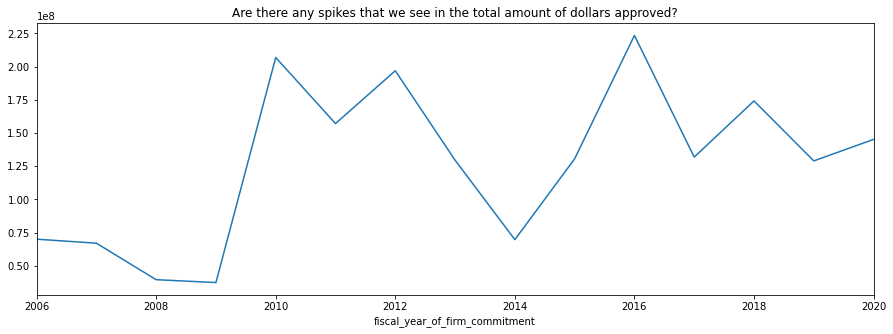

In [26]:
dallas.groupby(dallas.index)["final_mortgage_amount"].sum().plot.line(figsize=(15, 5))
plt.title("Are there any spikes that we see in the total amount of dollars approved?")

Text(0.5, 1.0, "Are there any spikes that we see in the quantity of mortgage's approved?")

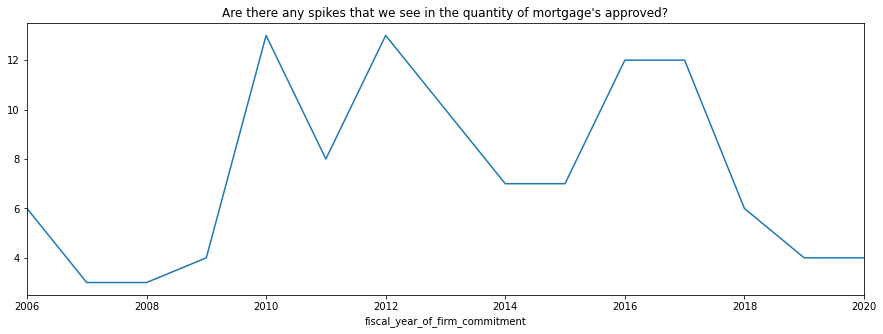

In [27]:
dallas.groupby(dallas.index)["final_mortgage_amount"].count().plot.line(figsize=(15, 5))
plt.title("Are there any spikes that we see in the quantity of mortgage's approved?")

Text(0.5, 1.0, 'What does the activitiy labels look like on the average amount spent?')

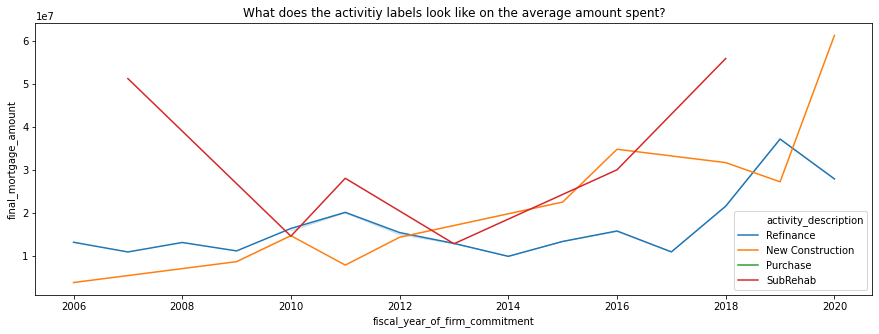

In [28]:
# What does the activity look like the most?

plt.figure(figsize=(15, 5))
sns.lineplot(data=dallas, x=dallas.index, y= "final_mortgage_amount", hue="activity_description", ci=False)
plt.title("What does the activitiy labels look like on the average amount spent?")

Dallas seems like a bit of an outlier, as the peaks for both total dollars approved, and quantity of loans approved started to spike before 2012. I think that the better year to have enter the market would have probably been 2011, as the market was rising. 

In terms of the activties, we do see that there rise in loans is attributted to `New Concstruction`, as it starts to increase in 2012. I am beggining to suspect that this is the category that benefits Clifton the most.

----

## Are there any trends or seasonality over time that we see in terms of number of loans approved / quantity?

In [29]:
# Let's look at quantity of loans approved

df = df.set_index("fiscal_year_of_firm_commitment")

Text(0, 0.5, 'Number of loans approved')

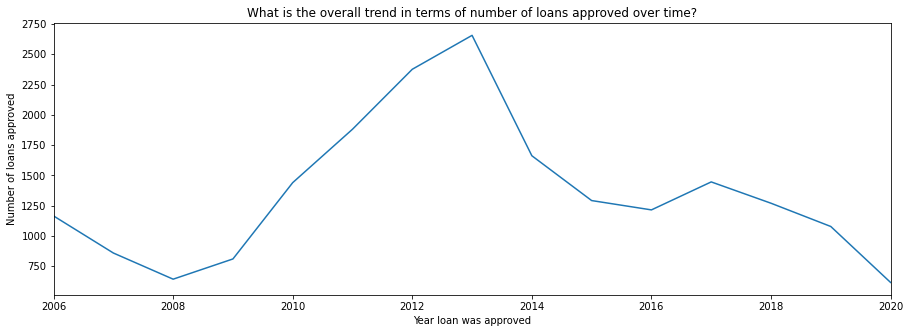

In [30]:
plt.title("What is the overall trend in terms of number of loans approved over time?")
df.groupby(df.index)["final_mortgage_amount"].count().plot.line(figsize=(15,5))
plt.xlabel("Year loan was approved")
plt.ylabel("Number of loans approved")

It weirdly seems that the martket peaked in terms of quantity of loans approved in 2013, and it has been decresing since.

In [31]:
states = df.project_state.unique()

In [32]:
states = df.sort_values(by = "final_mortgage_amount").project_state.unique()

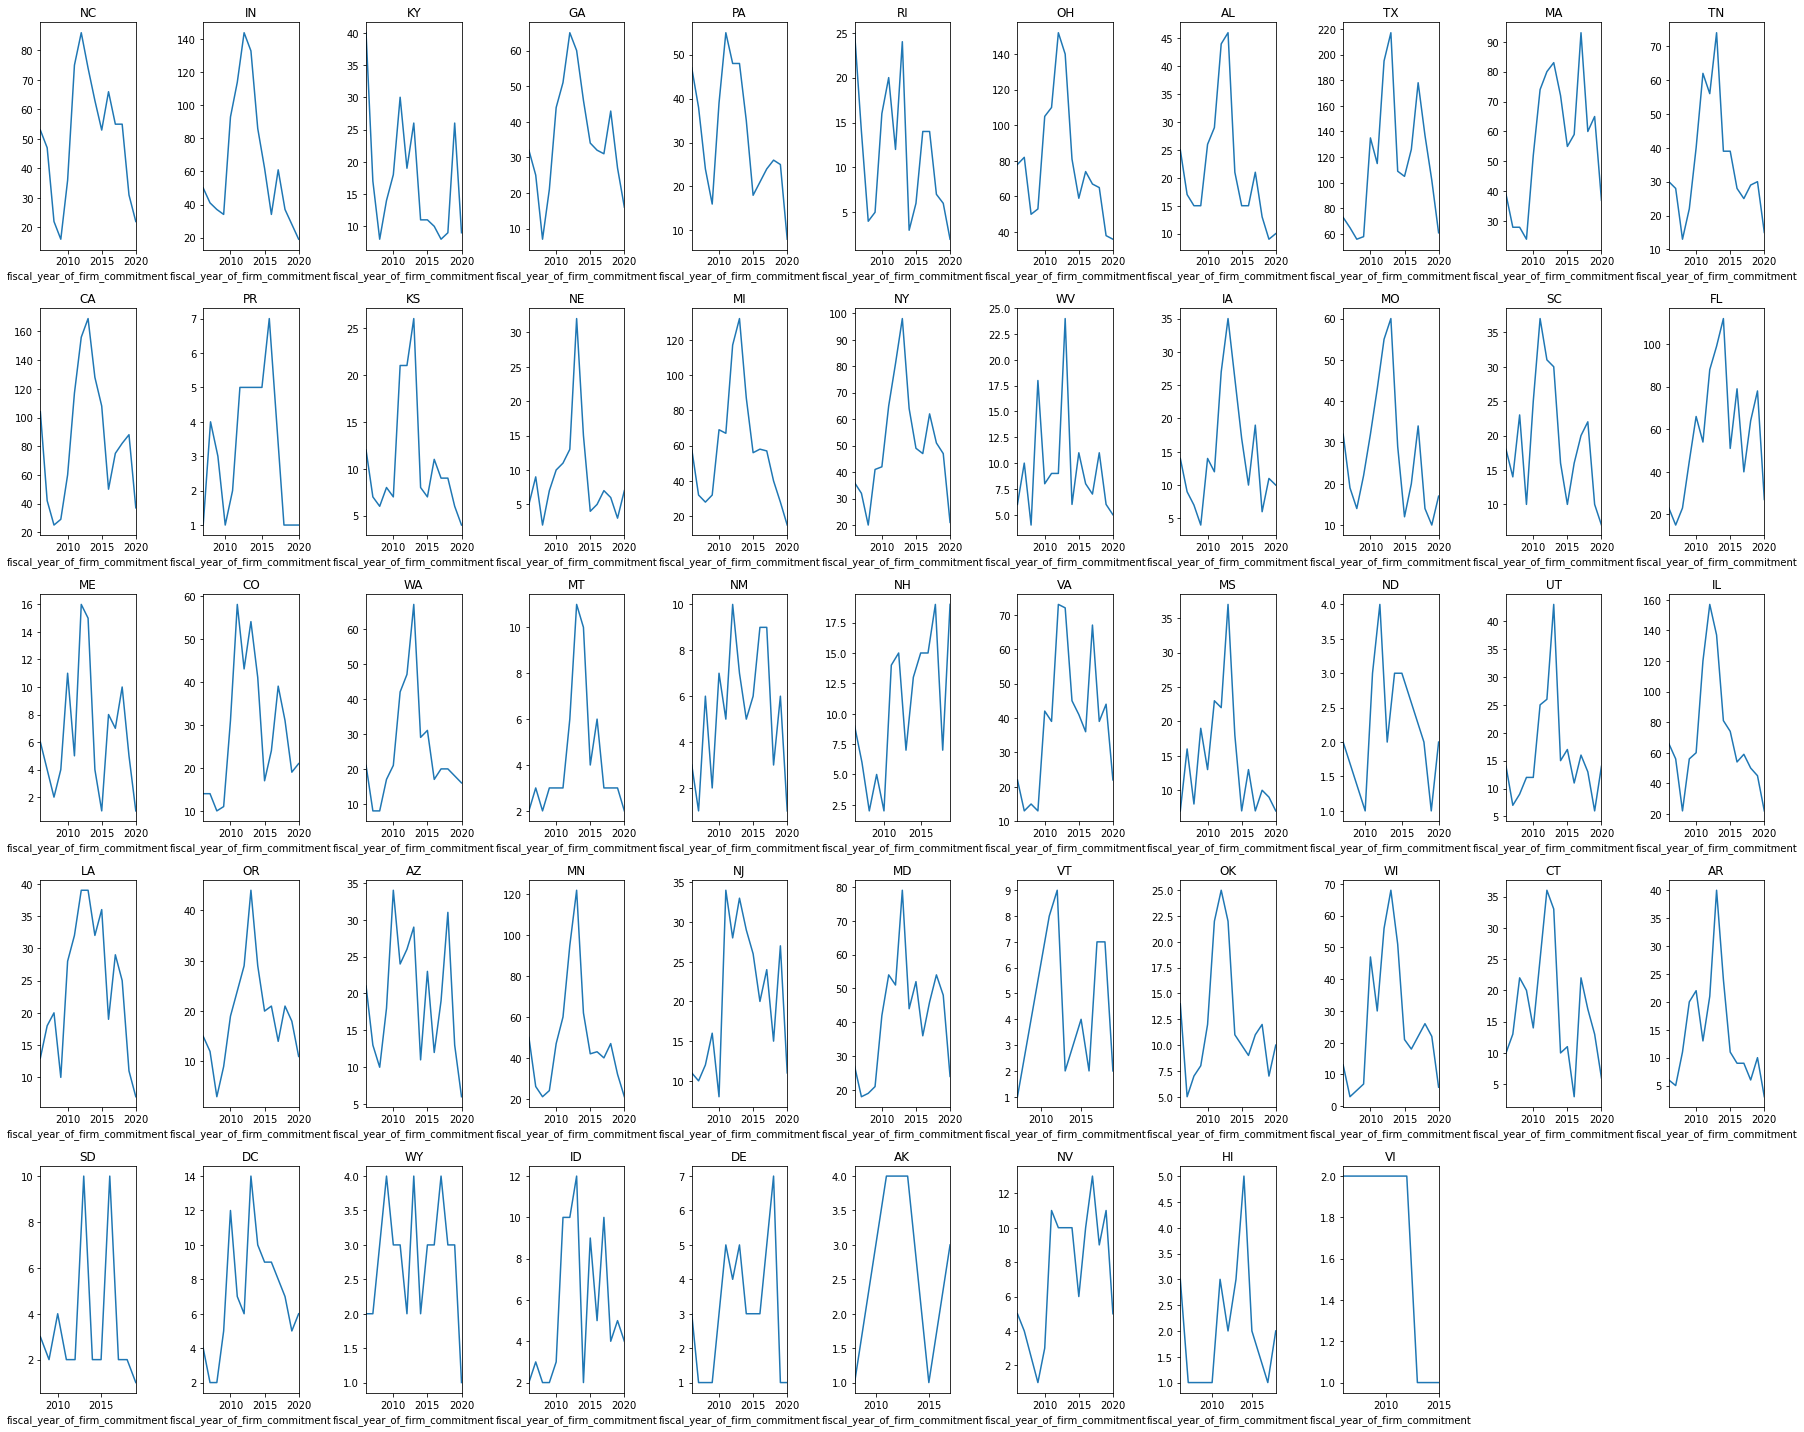

In [33]:
# Are there any states that are doing better in terms of loan approvals?

f = plt.figure(figsize=(25,20))

for count, element in enumerate(states):
    f.add_subplot(5,11, count+1)
    df_state = df[df.project_state == states[count]]
    df_state.groupby(df_state.index)["final_mortgage_amount"].count().plot.line()
    plt.title(f"{element}")

plt.tight_layout()

The graph is hard to read, but it seems that most of the states have had a decrease in the number of loans given.

Text(0, 0.5, 'Number of loans approved')

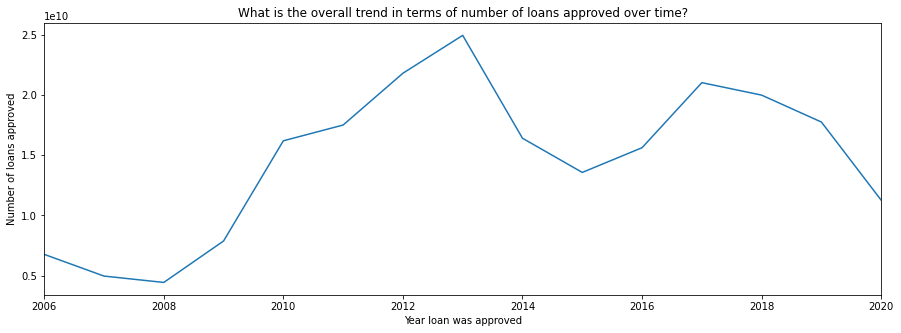

In [34]:
# Let's look at quantity, in dollars, of loans approved

plt.title("What is the overall trend in terms of number of loans approved over time?")
df.groupby(df.index)["final_mortgage_amount"].sum().plot.line(figsize=(15,5))
plt.xlabel("Year loan was approved")
plt.ylabel("Number of loans approved")

Similarly, it seems that the quanitity, in dollars, of loans approived had decreased since a peak in 2013

In [35]:
states = df.project_state.unique()

In [36]:
states = df.sort_values(by = "final_mortgage_amount").project_state.unique()

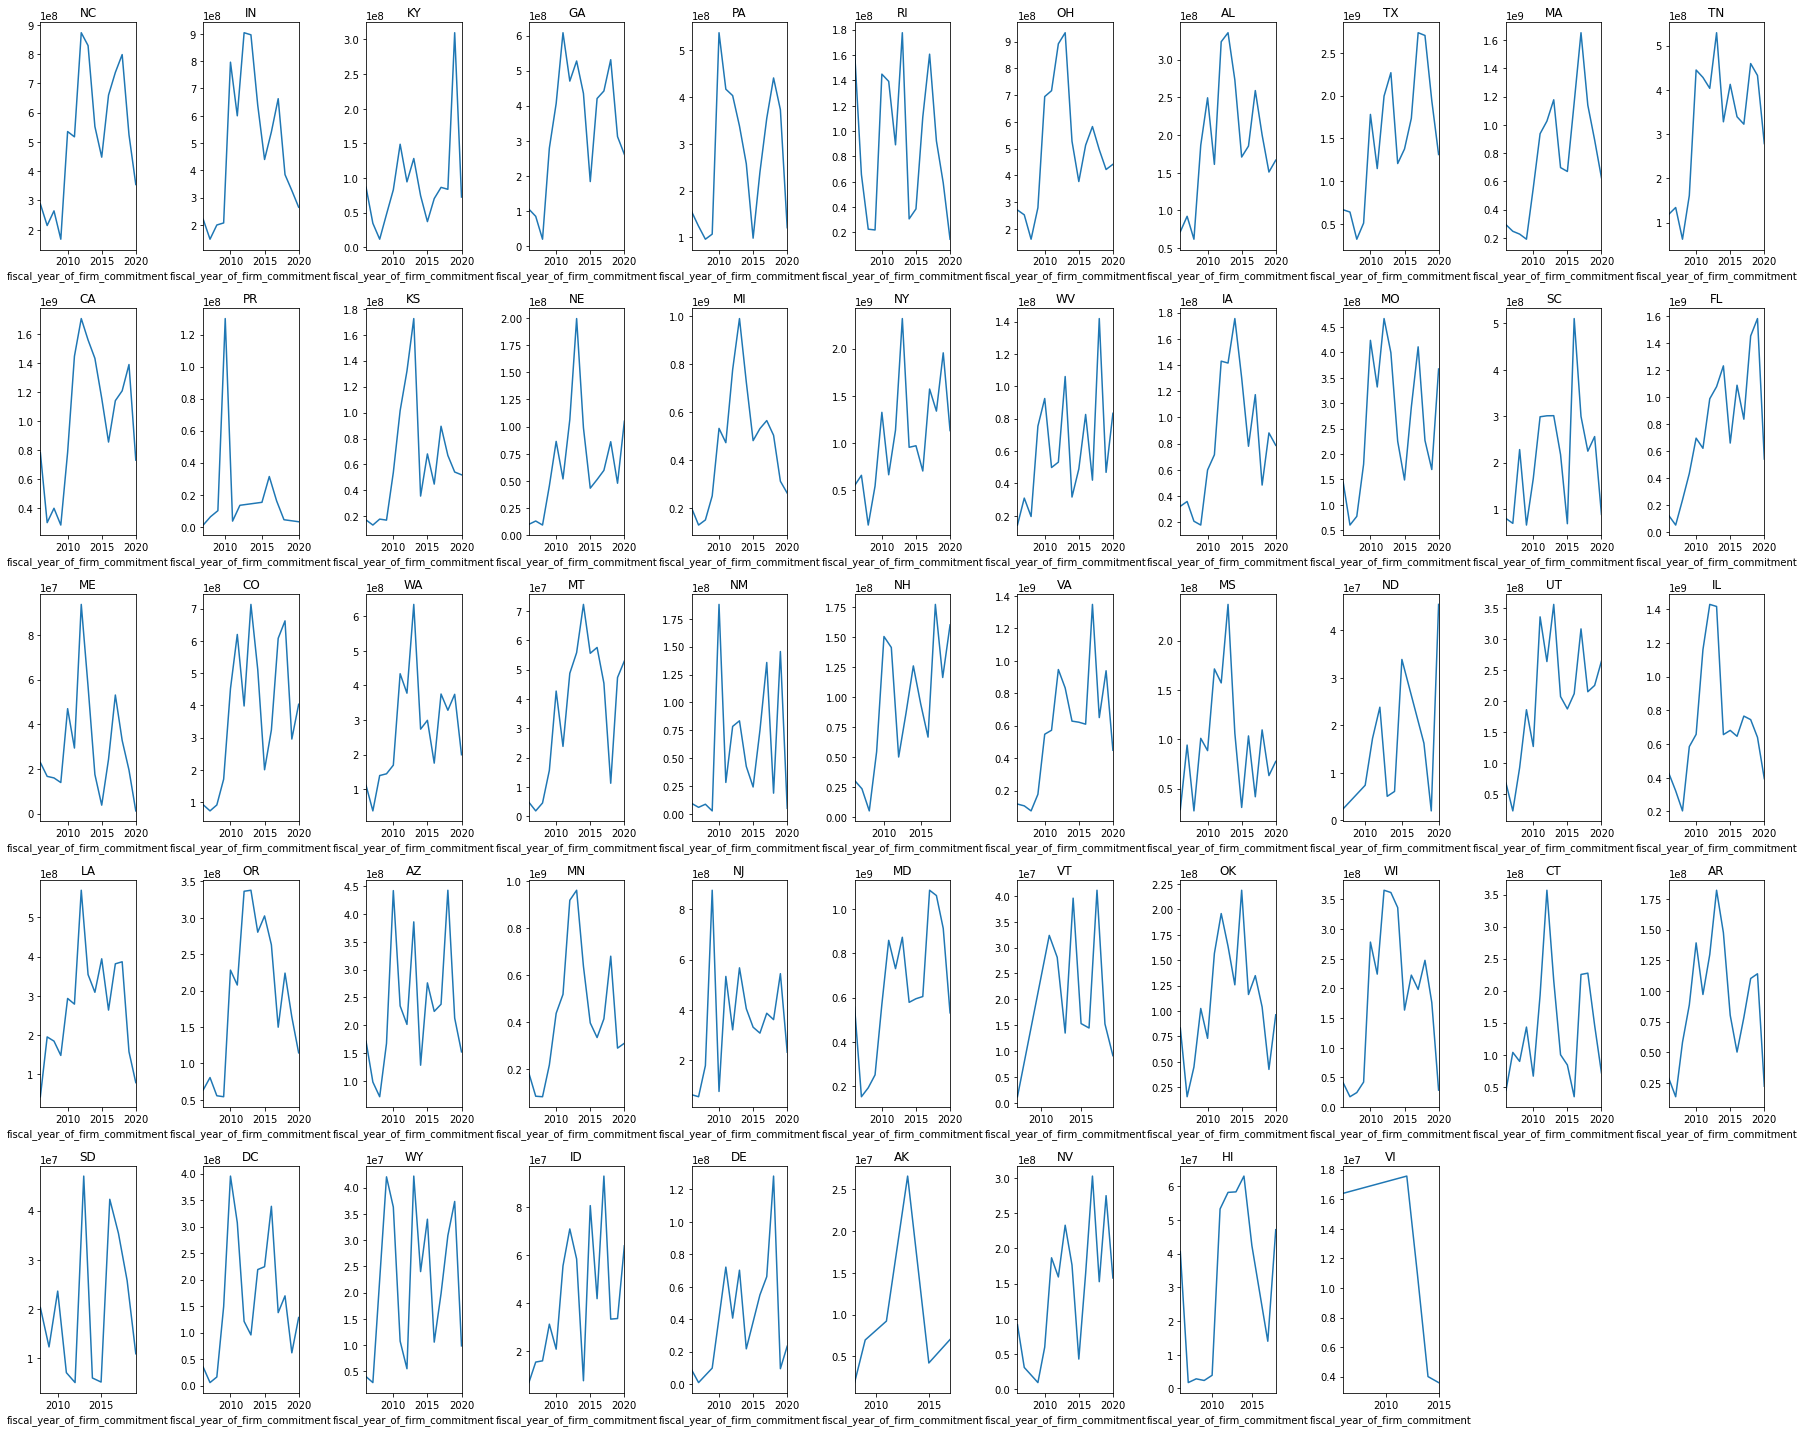

In [37]:
# Are there any states that are doing better in terms of loan approvals?

f = plt.figure(figsize=(25,20))

for count, element in enumerate(states):
    f.add_subplot(5,11, count+1)
    df_state = df[df.project_state == states[count]]
    df_state.groupby(df_state.index)["final_mortgage_amount"].sum().plot.line()
    plt.title(f"{element}")

plt.tight_layout()

----

Text(0.5, 0, 'Year loan was approved')

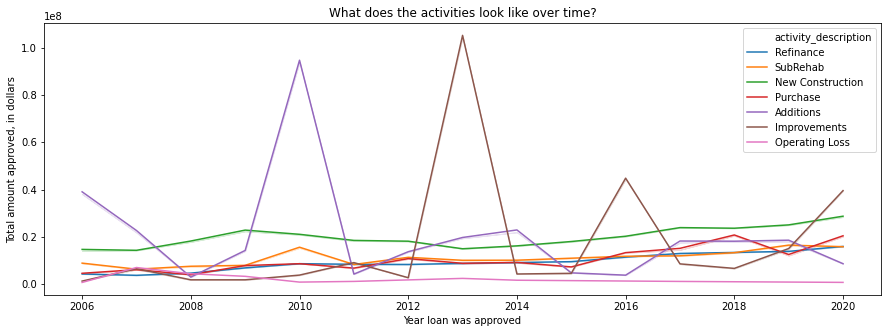

In [38]:
# Let's look at the descriptions

plt.figure(figsize=(15,5))
sns.lineplot(data=df, x=df.index, y="final_mortgage_amount", hue="activity_description", ci=False)
plt.title("What does the activities look like over time?")
plt.ylabel("Total amount approved, in dollars")
plt.xlabel("Year loan was approved")

It weirdly seems that the martket peaked in terms of quantity of loans approved in 2013, and it has been decresing since.

In [39]:
states = df.project_state.unique()

In [40]:
states = df.sort_values(by = "final_mortgage_amount").project_state.unique()

In [41]:
# # Are there any states that are doing better in terms of loan approvals?

# f = plt.figure(figsize=(25,20))

# for count, element in enumerate(states):
#     f.add_subplot(5,11, count+1)
#     df_state = df[df.project_state == states[count]]
#     sns.lineplot(data=df_state, x=df_state.index, y="final_mortgage_amount", hue="activity_description", ci=False)
#     plt.title(f"{element}")

# plt.tight_layout()
# plt.legend(" ")

## Is there a significant difference, by city, in the number of loans given per year?

Let's do statistical analysis to see if there is a huge difference between cities in terms of the number of loans they give each year.

In [42]:
import scipy.stats as stats

In [43]:
def preprocessing_for_modeling(df):
    """function to manipulate df into df usable for modeling"""
    # city mask identifies 35 cities with most hud loans
    city_mask = df.project_city.value_counts().nlargest(35)
    # apply city mask to shrink the df
    def in_city_mask(x):
        return x in city_mask
    df = df[df.project_city.apply(in_city_mask)]
    #create a df for modelling that groups-by year and city aggregating mortgage amount by count, median, mean, and sum
    df_for_model = (df.groupby(['fiscal_year_of_firm_commitment_activity', 'project_city'])
         .final_mortgage_amount.agg(['count', 'median', 'mean', 'sum']).reset_index())
    df_for_model = df_for_model.rename(columns={'fiscal_year_of_firm_commitment_activity': 'year', 'project_city': 'city'})
    return df_for_model

In [44]:
df = preprocessing_for_modeling(df)

In [45]:
cities = df.city.unique()

In [46]:
subgroup = df[df.city == "Dallas"]["count"]

In [47]:
p_scores = pd.DataFrame()
for city in cities:
    subgroup = df[df.city == city]["count"]
    tstat, p = stats.ttest_1samp(subgroup, df["count"].mean())
    result = pd.DataFrame({"city": city, "p": p}, index=[0])
    p_scores = pd.concat([p_scores, result])

In [48]:
# What percentage of cities are below our alpha (significantly different)

print(f"{p_scores[p_scores.p < 0.05].shape[0] / cities.shape[0]:.0%} of the total cities are below our alpha")

43% of the total cities are below our alpha


We are not trying to predict the city, so it is not as important that the data is significantly different. What we want to see is if there are patterns that we can pick up on that can help us identify those cities that are labeled as good.

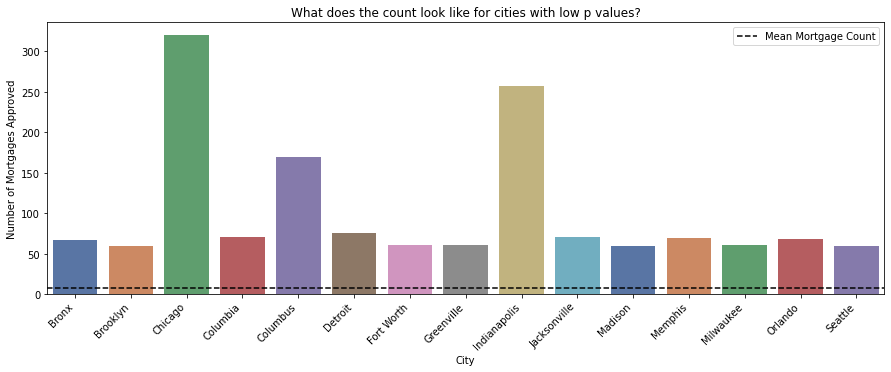

In [49]:
# Of the cities with a low p values, what is the average mortgate count?


u_cities = p_scores[p_scores.p < 0.05].city.unique()
comparison = pd.DataFrame()
for element in u_cities:
    score = pd.DataFrame({"city": element, "count": df[df.city == element]['count'].sum()}, index=[0])
    comparison = pd.concat([comparison, score])
    

plt.figure(figsize=(15,5))
graph = sns.barplot(data=comparison, x="city", y="count", palette="deep")
graph.axhline(df["count"].mean(), ls='--', label="Mean Mortgage Count", c="black")
plt.xticks(rotation=45, ha="right")
plt.title("What does the count look like for cities with low p values?")
plt.ylabel("Number of Mortgages Approved")
plt.xlabel("City")
plt.legend()

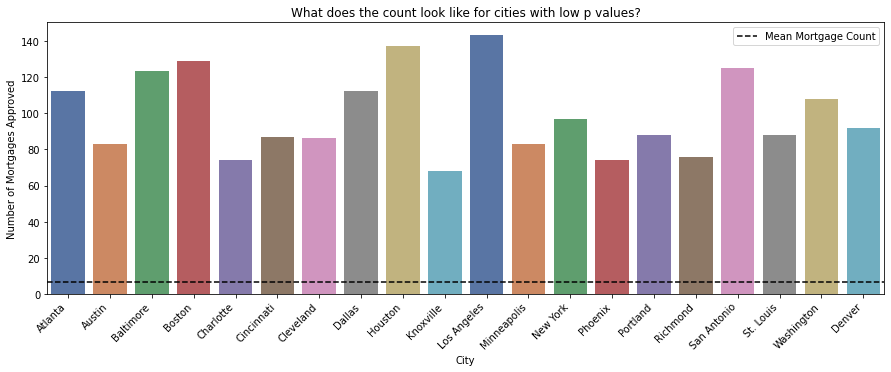

In [50]:
# Of the cities with a high p values, what is the average mortgate count?


u_cities = p_scores[p_scores.p > 0.05].city.unique()
comparison = pd.DataFrame()
for element in u_cities:
    score = pd.DataFrame({"city": element, "count": df[df.city == element]['count'].sum()}, index=[0])
    comparison = pd.concat([comparison, score])
    

plt.figure(figsize=(15,5))
graph = sns.barplot(data=comparison, x="city", y="count", palette="deep")
graph.axhline(df["count"].mean(), ls='--', label="Mean Mortgage Count", c="black")
plt.xticks(rotation=45, ha="right")
plt.title("What does the count look like for cities with low p values?")
plt.ylabel("Number of Mortgages Approved")
plt.xlabel("City")
plt.legend()

## Is there a significant difference, by city, in the amount of loans given per year, in dollars?

In [51]:
subgroup = df[df.city == "Dallas"]["mean"]

result = pd.DataFrame({"city": city, "p": p}, index=[0])
result

,city,p
0,Denver,0.770658


In [52]:
cities = df.city.unique()
p_scores = pd.DataFrame()
for city in cities:
    subgroup = df[df.city == city]["mean"]
    tstat, p = stats.ttest_1samp(subgroup, df["mean"].mean())
    result = pd.DataFrame({"city": city, "p": p}, index=[0])
    p_scores = pd.concat([p_scores, result])

In [53]:
# What percentage of cities are below our alpha (significantly different)

print(f"{p_scores[p_scores.p < 0.05].shape[0] / cities.shape[0]:.0%} of the total cities are below our alpha")

40% of the total cities are below our alpha


We still see that below half of the population actually (in cities) is actually below the p-value. We see that, in dollars, there is at least some difference. 

In [54]:
score = pd.DataFrame({"city": element, "mean":df[df.city == element]['mean'].sum()}, index=[0])
score

,city,mean
0,Denver,1.540032e+08


In [55]:
print(f'The mean mortgage approved, in dollars, ${df["mean"].mean():,.0f}')

The mean mortgage approved, in dollars, $13,566,971


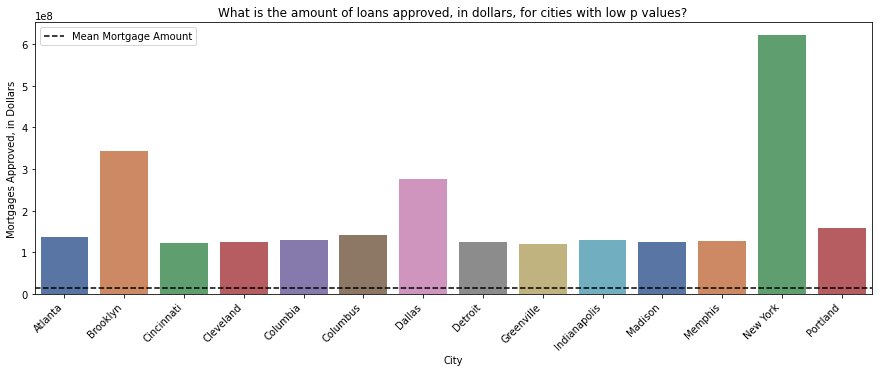

In [56]:
# Of the cities with a low p values, what is the average mortgate count?


u_cities = p_scores[p_scores.p < 0.05].city.unique()
comparison = pd.DataFrame()
for element in u_cities:
    score = pd.DataFrame({"city": element, "mean": df[df.city == element]['mean'].sum()}, index=[0])
    comparison = pd.concat([comparison, score])
    

plt.figure(figsize=(15,5))
graph = sns.barplot(data=comparison, x="city", y="mean", palette="deep")
graph.axhline(df["mean"].mean(), ls='--', label="Mean Mortgage Amount", c="black")
plt.xticks(rotation=45, ha="right")
plt.title("What is the amount of loans approved, in dollars, for cities with low p values?")
plt.ylabel("Mortgages Approved, in Dollars")
plt.xlabel("City")
plt.legend()

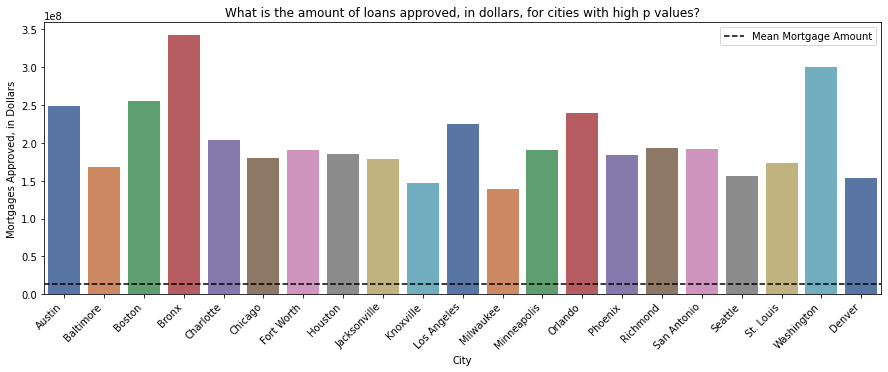

In [57]:
# Of the cities with a low p values, what is the average mortgate count?


u_cities = p_scores[p_scores.p > 0.05].city.unique()
comparison = pd.DataFrame()
for element in u_cities:
    score = pd.DataFrame({"city": element, "mean": df[df.city == element]['mean'].sum()}, index=[0])
    comparison = pd.concat([comparison, score])
    

plt.figure(figsize=(15,5))
graph = sns.barplot(data=comparison, x="city", y="mean", palette="deep")
graph.axhline(df["mean"].mean(), ls='--', label="Mean Mortgage Amount", c="black")
plt.xticks(rotation=45, ha="right")
plt.title("What is the amount of loans approved, in dollars, for cities with high p values?")
plt.ylabel("Mortgages Approved, in Dollars")
plt.xlabel("City")
plt.legend()

## Things to discuss with everyone:

1. Added new list to Trello. This is a bit different, but the idea is that we add new cards as we open different Git Documents. This is to reduce the risk of a merge conflict.
1. Divide exploration:
    * Is there a difference in mortgages by year by type for whole data set?
    * Is there a significant difference, by city, in the number of loans given per year?
    * Is there a significant difference, by city, in the dollar amount of loans approved, by year?
    * What are the characteristics of loan practices in Houston (2009), Seattle (2010),  and Dallas (2012)?
    * Are there any trends or seasonality over time that we see in terms of number of loans approved / quantity?
    * Show the yearly mortgages by type for whole data set?
    

----

# Modeling

## Idea 1:

For this project - we will have to do a time series regression and a time series classification. Essentially, what I think needs to happen is that we feed our features to the regression model, and the output is given for a ceirtain year. 

Then, we can use the output (which will be the predicted level of activity, in a continuous feature) to determine whether a market is worth entering or not.

1. Time Series Model:
    * Objective:
        * To determine what the level of activity will be in a city. We want to use Time Series, to predict what the future mortage is in dollars, the frequency and the number of activities.
    * Considerations:
        * Need to create independent time series models for each city. 
        * If we use FB Prophet, we can only predict one feature at at time
    * Output:
        * A prediction for:
            * Sum of mortages approved (in dollars) by city
            * Number of mortages approved by city)
            * Predicted number of activities (might be a classification problem)
    
1. Classification Model:
    * Objective:
        * To determine what city and when (in year) Testfit should enter the market. 
    * Other ideas:
        * Instead of using time series, we can use Linear Regression, to combine our key features, and predict a "score". To accomplish this, we would need to label the data ourselves, with a score between a 1 or a 10. At that point, this can be come a classification problem, with a time series element where the prediction is done based on a date (as an index). 
    * Output:
        * A score (1 - 10) of whether the city and year would be a good point of entry, given the conditions predicted from the time series model.
        
        
The work flow would look as following:

1. Create a time series model to predict the values above, for the next 5 years. 
1. Evaluate model, and decide on best performer
1. Label the existing data with a score, based on some of the feedback that we get from Clifton
1. Create and fit a classification model to predict the score of the future predictions. 
1. Evaluate and decide on best performer
1. Use classification model to predict score, by city, using the predictions created by the time series, using the index as a reference for year (but datetime won't be a feature). 
1. Use the classification predictions to make recommendations of what cities, at what year, will be the best points of entry for Testfit.

## Idea 2: Optimal

Maggie and the coaches actually suggested doing a classification model, with time as a label.

* Observations:
    * Each observation will have a city, and a year as a label / index.
* Features:
    * Calcualte features that can be standarized across all observations:
        * Some potential examples:
            * Year over Year growth
            * Median 
            * Variance
            * Rolling Avg
            * Num of years since max
            * year over year change
            * percentile among other cities / within a state
            * Evolution index
    * We need to label the data, based on whether Clifton would have historically enter the market or not. 
* Predictions:
    * Calculate the features for 2020/2021, based on trends and time series. 
* Model:
    * Use a classification model to predict the label on the predicted data

---

### What would the data need to look like for modeling

In [58]:
train = pd.DataFrame({"city_year": ["san_antonio_2017" ,"san_antonio_2018"], "year_delta": [.2, .3], "avg_growth": [.5, .4], "score":["enter", "don't enter"]}, index=[0, 1])

In [59]:
predict = pd.DataFrame({"city_year": ["san_antonio_2020"], "year_delta": [.4], "avg_growth": [.3], "score":[" "]}, index=[0])

In [60]:
train

,city_year,year_delta,avg_growth,score
0,san_antonio_2017,0.2,0.5,enter
1,san_antonio_2018,0.3,0.4,don't enter


In [61]:
predict

,city_year,year_delta,avg_growth,score
0,san_antonio_2020,0.4,0.3,


1. Train model using the train data
1. Calculate the features for the next two years (using averages and historical data)
1. predict using the model

-------

In [62]:
df.head()

,year,city,count,median,mean,sum
0,2006,Atlanta,6,4457100.0,5.531133e+06,33186800
1,2006,Austin,1,14083843.0,1.408384e+07,14083843
2,2006,Baltimore,6,4570450.0,5.993167e+06,35959000
3,2006,Boston,7,3941300.0,7.059614e+06,49417300
4,2006,Bronx,5,1155300.0,3.650720e+06,18253600


In [63]:
df.city.value_counts()

Cincinnati      15
Columbia        15
Portland        15
Baltimore       15
Memphis         15
Columbus        15
St. Louis       15
Chicago         15
Minneapolis     15
Phoenix         15
Atlanta         15
New York        15
Houston         15
Dallas          15
Orlando         15
Los Angeles     15
Austin          15
Indianapolis    15
Washington      15
Cleveland       15
Boston          15
Detroit         15
Jacksonville    14
Fort Worth      14
San Antonio     14
Denver          14
Madison         14
Bronx           14
Seattle         14
Greenville      14
Brooklyn        14
Richmond        14
Charlotte       14
Milwaukee       14
Knoxville       13
Name: city, dtype: int64

In [64]:
# What is the time range?

df.year.min(), df.year.max() 

(2006, 2020)

-----

## Modeling Prep

Features that we should look at:
* Year over Year growth
* Median 
* Variance
* Rolling Avg
* Num of years since max
* year over year change
* percentile among other cities / within a state
* Evolution index

In [65]:
# mean rate of change

df["mean_var"] = df.sort_values(["city", "year"])["mean"].pct_change() * 100

In [66]:
df = df.sort_values(["city", "year"])

In [67]:
df

,year,city,count,median,mean,sum,mean_var
0,2006,Atlanta,6,4457100.0,5.531133e+06,33186800,NaN
34,2007,Atlanta,8,3031150.0,3.534700e+06,28277600,-36.094471
66,2008,Atlanta,2,3367500.0,3.367500e+06,6735000,-4.730246
98,2009,Atlanta,9,4400000.0,5.552544e+06,49972900,64.886249
130,2010,Atlanta,11,5196100.0,6.253490e+06,68788385,12.623854
...,...,...,...,...,...,...,...
373,2016,Washington,8,27352400.0,3.910451e+07,312836100,44.588606
407,2017,Washington,8,11693000.0,1.719466e+07,137557300,-56.028956
442,2018,Washington,7,25450000.0,2.417843e+07,169249000,40.615895
476,2019,Washington,5,9300000.0,1.234469e+07,61723450,-48.943373


In [68]:
# count rate of change

df["count_var"] = df.sort_values(["city", "year"])["count"].pct_change() * 100

In [69]:
df

,year,city,count,median,mean,sum,mean_var,count_var
0,2006,Atlanta,6,4457100.0,5.531133e+06,33186800,NaN,NaN
34,2007,Atlanta,8,3031150.0,3.534700e+06,28277600,-36.094471,33.333333
66,2008,Atlanta,2,3367500.0,3.367500e+06,6735000,-4.730246,-75.000000
98,2009,Atlanta,9,4400000.0,5.552544e+06,49972900,64.886249,350.000000
130,2010,Atlanta,11,5196100.0,6.253490e+06,68788385,12.623854,22.222222
...,...,...,...,...,...,...,...,...
373,2016,Washington,8,27352400.0,3.910451e+07,312836100,44.588606,0.000000
407,2017,Washington,8,11693000.0,1.719466e+07,137557300,-56.028956,0.000000
442,2018,Washington,7,25450000.0,2.417843e+07,169249000,40.615895,-12.500000
476,2019,Washington,5,9300000.0,1.234469e+07,61723450,-48.943373,-28.571429


In [70]:
# evolution index
# EI = (1 + Company Growth %) / (1 + Market Growth %) X 100

# How can I calculate the market growth for each year?

df["market_growth"] = df.groupby("year").mean_var.transform("mean")

df["ei"] = (1+ df.mean_var) / (1+ df.market_growth) * 100

In [71]:
df.groupby("year")["median"].mean()

year
2006    5.922234e+06
2007    4.991248e+06
2008    5.355578e+06
2009    9.600630e+06
2010    1.166027e+07
2011    9.229499e+06
2012    8.957163e+06
2013    9.402306e+06
2014    1.039309e+07
2015    1.104743e+07
2016    1.198953e+07
2017    1.395927e+07
2018    1.582957e+07
2019    1.615349e+07
2020    2.000965e+07
Name: median, dtype: float64

In [72]:
df["ei"] 

0             NaN
34     -61.085643
66      -6.461252
98      49.496410
130      6.990643
          ...    
373     93.765288
407   -113.578021
442    111.205878
476   -361.764086
510    213.472732
Name: ei, Length: 511, dtype: float64

Text(0.5, 0, 'City')

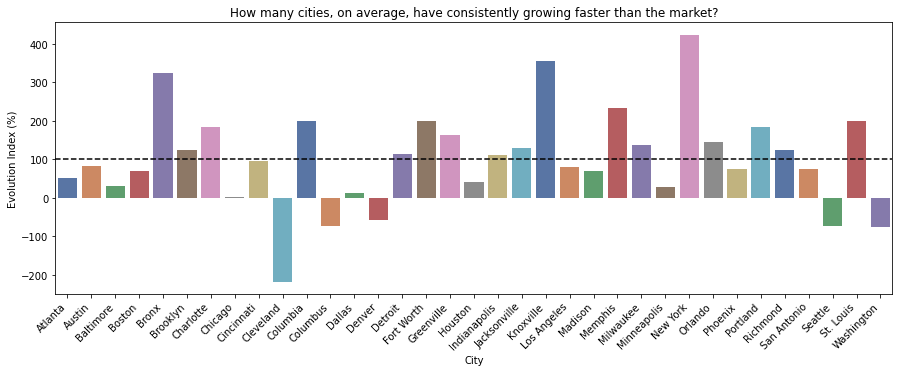

In [73]:
plt.figure(figsize=(15,5))
graph = sns.barplot(data=df, x="city", y="ei", ci=False, palette="deep")
plt.title("How many cities, on average, have consistently growing faster than the market?")
plt.xticks(rotation=45, ha="right")
graph.axhline(100, ls='--', label="Market Growth", c="black")
plt.ylabel("Evolution Index (%)")
plt.xlabel("City")


Really interestingly, 40% of our current cities have had a consistent EI of 100% of more.

In [74]:
# What is the mean count for cities with a 100$

In [75]:
df.sample(10)

,year,city,count,median,mean,sum,mean_var,count_var,market_growth,ei
409,2018,Austin,10,34747850.0,3.049655e+07,304965500,71.594036,25.000000,36.422388,193.985579
476,2019,Washington,5,9300000.0,1.234469e+07,61723450,-48.943373,-28.571429,12.252663,-361.764086
67,2008,Austin,1,2635000.0,2.635000e+06,2635000,-75.919910,-50.000000,56.732555,-129.770646
224,2012,Minneapolis,10,9820500.0,1.257792e+07,125779200,-16.042852,66.666667,8.726639,-154.656216
422,2018,Detroit,6,8517800.0,1.040937e+07,62456200,153.485125,50.000000,36.422388,412.814719
99,2009,Austin,1,18128300.0,1.812830e+07,18128300,587.981025,0.000000,132.113188,442.466322
104,2009,Chicago,17,11868600.0,1.183984e+07,201277300,22.139389,112.500000,132.113188,17.383243
410,2018,Baltimore,15,12327000.0,1.677562e+07,251634300,13.806745,66.666667,36.422388,39.566542
240,2013,Charlotte,6,13785000.0,2.259072e+07,135544300,80.910552,-40.000000,56.587037,142.237830
273,2014,Bronx,5,15767000.0,1.605152e+07,80257600,-84.386262,-37.500000,28.420251,-283.431514


In [76]:
# Creating the labels

#For now, only three cities will be labeled as enter (Houston 2009, Seattle 2010, Dallas 2012)

df["index"] = np.nan

In [77]:
# Dallas 2012
df.loc[211] = df.loc[211].fillna(1)

In [78]:
# Houston 2009
df.loc[113] = df.loc[113].fillna(1)

In [79]:
# Seattle 2010

df.loc[161] = df.loc[161].fillna(1)

In [80]:
df["index"] = df["index"].fillna(0)

In [81]:
# To avoid Nan's, I have removed all data from 2006 (because all the var's would be nan)

df_model = df[df.year > 2006]

-----

## Classification Model Training

**Index** = `City` + `State` + `Year`

**Features** = `count_var`, `ei`


**target** = `index`

In [82]:
df_model["label"] = df_model.city + "_"  + df_model.year.astype(str)

In [83]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [84]:
df_model.head()

,year,city,count,median,mean,sum,mean_var,count_var,market_growth,ei,index,label
34,2007,Atlanta,8,3031150.0,3.534700e+06,28277600,-36.094471,33.333333,56.451259,-61.085643,0.0,Atlanta_2007
66,2008,Atlanta,2,3367500.0,3.367500e+06,6735000,-4.730246,-75.000000,56.732555,-6.461252,0.0,Atlanta_2008
98,2009,Atlanta,9,4400000.0,5.552544e+06,49972900,64.886249,350.000000,132.113188,49.496410,0.0,Atlanta_2009
130,2010,Atlanta,11,5196100.0,6.253490e+06,68788385,12.623854,22.222222,193.886996,6.990643,0.0,Atlanta_2010
164,2011,Atlanta,10,4341850.0,5.621590e+06,56215900,-10.104751,-9.090909,-6.403212,168.506275,0.0,Atlanta_2011


In [85]:
features_for_modeling = ["label", "count_var", "ei", "index"]

data = df_model[features_for_modeling].set_index("label")

In [86]:
data

,count_var,ei,index
label,,,
Atlanta_2007,33.333333,-61.085643,0.0
Atlanta_2008,-75.000000,-6.461252,0.0
Atlanta_2009,350.000000,49.496410,0.0
Atlanta_2010,22.222222,6.990643,0.0
Atlanta_2011,-9.090909,168.506275,0.0
...,...,...,...
Washington_2016,0.000000,93.765288,0.0
Washington_2017,0.000000,-113.578021,0.0
Washington_2018,-12.500000,111.205878,0.0


In [87]:
train, test = train_test_split(data, train_size=.75, random_state=123)

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, precision_score

In [89]:
X_train = train.drop(columns="index")
y_train = train["index"]
X_test = test.drop(columns="index")
y_test = test["index"]

## Decision Tree

In [90]:
#  keys are names of hyperparams, values are a list of values to try for that hyper parameter
params = {
    'max_depth': range(1, 11),
    'criterion': ['gini', 'entropy']
}

dtree = DecisionTreeClassifier(max_depth=4)

# cv=4 means 4-fold cross-validation, i.e. k = 4
grid = GridSearchCV(dtree, params, cv=4)
grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [91]:
# .best_estimator_ gives us a model that is prefit with the best hyperparams
model = grid.best_estimator_
model.score(X_test, y_test)

0.9916666666666667

In [92]:
results = grid.cv_results_

for score, p in zip(results['mean_test_score'], results['params']):
    p['score'] = score
pd.DataFrame(results['params'])

,criterion,max_depth,score
0,gini,1,0.994413
1,gini,2,0.994413
2,gini,3,0.980368
3,gini,4,0.983177
4,gini,5,0.985986
5,gini,6,0.980368
6,gini,7,0.980368
7,gini,8,0.980368
8,gini,9,0.985986
9,gini,10,0.985986


## Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#  keys are names of hyperparams, values are a list of values to try for that hyper parameter
params = {
    'max_depth': range(1, 11),
    "min_samples_leaf": range(1,20)
}

rf = RandomForestClassifier(random_state = 123)

# cv=4 means 4-fold cross-validation, i.e. k = 4
grid = GridSearchCV(rf, params, cv=4)
grid.fit(X_train, y_train)

grid.best_params_

In [ ]:
# .best_estimator_ gives us a model that is prefit with the best hyperparams
model = grid.best_estimator_
model.score(X_test, y_test)

In [ ]:
results = grid.cv_results_

for score, p in zip(results['mean_test_score'], results['params']):
    p['score'] = score
pd.DataFrame(results['params'])

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

params = {
    'weights': ["uniform", "distance"],
    "n_neighbors": range(1,20)
}


# cv=4 means 4-fold cross-validation, i.e. k = 4
grid = GridSearchCV(knn, params, cv=4)
grid.fit(X_train, y_train)

grid.best_params_

In [ ]:
# .best_estimator_ gives us a model that is prefit with the best hyperparams
model = grid.best_estimator_
model.score(X_test, y_test)

In [ ]:
results = grid.cv_results_

for score, p in zip(results['mean_test_score'], results['params']):
    p['score'] = score
pd.DataFrame(results['params'])

In [ ]:
import preprocessing

In [ ]:
test = preprocessing.get_model_df()

In [ ]:
test.head()

In [ ]:
df = preprocessing.get_model_df()

In [ ]:
df = preprocessing.add_new_features(df)

----

# For Second Round

For later: 

* Create a new feature for modeling that looks at the percent of the total_mortgage's that are `new_construction` and calcualte their rate of change over time.

In [ ]:
df_test = wrangle.wrangle_hud()

In [ ]:
 #create a df for modelling that groups-by year and city aggregating mortgage amount by count, median, mean, and sum
df_for_model = (df_test.groupby(['activity_description', 'project_city'])
     .final_mortgage_amount.agg(['count', 'median', 'mean', 'sum']).reset_index())

In [ ]:
df_for_model[df_for_model.activity_description == "New Construction"]

____

## MVP Modeling

* For this phase - we will only use cities that have 15 years worth of data.

The reason for this is because the calculations for the features are derived from continious data. Further work will need to be done to more accurately calculate cities with less years. 

In [ ]:
model_df = preprocessing.get_model_df()

In [ ]:
model_df

In [ ]:
# # city mask identifies 35 cities with most hud loans
#     city_mask = df.project_city.value_counts().nlargest(35)
#     # apply city mask to shrink the df
#     def in_city_mask(x):
#         return x in city_mask
#     df = df[df.project_city.apply(in_city_mask)]

In [ ]:
df["city_state"] = df["city"] + "_" + df["state"]

In [ ]:
city_mask = df.groupby("city_state").year.count()

In [ ]:
city_mask = city_mask[city_mask == 15]

In [ ]:
# apply city mask to shrink the df
def in_city_mask(x):
    return x in city_mask
df = df[df.city_state.apply(in_city_mask)]

In [ ]:
df.sort_values(["city", "state", "year"])

In [ ]:
df = preprocessing.add_new_features(df)

In [ ]:
df = df.sort_values(["city", "state", "year"])

In [ ]:
features_for_modeling = ["quantity_var", "observation_id", "ei", "label"]
X_train, y_train, X_test, y_test = preprocessing.prep_data_for_modeling(df, features_for_modeling)

In [ ]:
X_train.sort_index()

In [ ]:
df[df.city=="Austin"]

In [ ]:
import model

In [ ]:
grid, df_result, best_model = model.run_decision_tree(X_train, y_train)

In [ ]:
grid, df_result, best_model = model.run_random_forest(X_train, y_train)

In [ ]:
grid, df_result, best_model = model.run_knn(X_train, y_train)

# Things to fix:

1. Figure out a way to better calcualte variation


## Predictions:

Now we will make predictions, based on the previous datasets. Meaning that we will need to create a new dataframe.

In [ ]:
model_df = preprocessing.get_model_df()

df["city_state"] = df["city"] + "_" + df["state"]

city_mask = df.groupby("city_state").year.count()

city_mask = city_mask[city_mask == 15]

# apply city mask to shrink the df
def in_city_mask(x):
    return x in city_mask
df = df[df.city_state.apply(in_city_mask)]

df = preprocessing.add_new_features(df)

df = df.sort_values(["city", "state", "year"])

In [ ]:
predictions = df[(df.year == 2020) | (df.year == 2019)].groupby("city_state")[["quantity_var", "ei"]].mean()
predictions

In [ ]:
predictions["label"] = best_model.predict(predictions)

In [ ]:
predictions

In [ ]:
city = predictions.reset_index().city_state.str.split("_", n=1, expand=True)[0]

In [ ]:
city

In [ ]:
state = predictions.reset_index().city_state.str.split("_", n=1, expand=True)[1]

In [ ]:
predictions = predictions.reset_index()

In [ ]:
predictions["city"] = city

In [ ]:
predictions["state"] = state

In [ ]:
predictions

In [ ]:
df = preprocessing.get_model_df()

In [ ]:
df.head()

In [ ]:
df["city_state"] = df["city"] + "_" + df["state"]

In [ ]:
city_mask = df.groupby("city_state").year.count()

city_mask = city_mask[city_mask == 15]

# apply city mask to shrink the df
def in_city_mask(x):
    return x in city_mask
df = df[df.city_state.apply(in_city_mask)]

df = df.sort_values(["city", "state", "year"])

# features_for_modeling = ["quantity_var", "observation_id", "ei", "label"]
# X_train, y_train, X_test, y_test = preprocessing.prep_data_for_modeling(df, features_for_modeling)

In [ ]:
def calculate_mortgage_var(df):
    df["mean_var"] = df.sort_values(["city", "state", "year"])["average_mortgage_amount"].pct_change() * 100
    return df

def calculate_mortgage_cnt_var(df):
    df["quantity_var"] = df.sort_values(["city", "state", "year"])["quantity_of_mortgages"].pct_change() * 100
    return df

def calculate_evolution_index(df):
    # EI = (1 + Company Growth %) / (1 + Market Growth %) X 100
    df = df.sort_values(["city", "state", "year"])
    df["market_growth"] = df.groupby("year").mean_var.transform("mean")

    df["ei"] = (100 + df.mean_var) / (100 + df.market_growth) * 100

    return df

In [ ]:
df_test = calculate_mortgage_var(df)

In [ ]:
df_test = calculate_evolution_index(df)

In [ ]:
df_test[df_test.city == "Atlanta"].sort_values(["city", "state", "year"])

In [ ]:
(100 + 4.28) / (100 + 20.18) * 100